1. Introduce the Data

Task: Given attributes about a prson, predict whether he/she will be able to pay loan in furture or not

In [30]:
import numpy as np
import pandas as pd

df = pd.read_csv("credit_train.csv")

# removing unwanted features like LOanID and CustomerID
df = df.drop(df[['Loan ID', 'Customer ID']], axis=1)
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maximum Open Credit             99998 non-null float64
Bankruptcies                    99796 non-null float64
Tax 

In [32]:
df = df.dropna(thresh=17)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 17 columns):
Loan Status                     36423 non-null object
Current Loan Amount             36423 non-null float64
Term                            36423 non-null object
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null object
Home Ownership                  36423 non-null object
Purpose                         36423 non-null object
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens       



Outlier Visualization using Box-Plot

######## changing dtype from 'object' to 'float'#################

In [34]:


df['Loan Status'] = [0 if x == 'Fully Paid' else 1 for x in  df['Loan Status']]

# removing string data from column 'Years in current job' to make it float type
mapping_dict = {'8 years': 8, '10+ years': 10, '3 years': 3, '5 years': 5, '< 1 year': 0, '2 years': 2,
                '4 years': 4, '9 years': 9, '7 years': 7, '1 year': 1, '6 years': 6, 'n/a': np.nan}


def f(x):
    try:
        return mapping_dict[x]
    except:
        return x


df['Years in current job'] = df['Years in current job'].apply(f).astype(np.float64)

In [12]:
#Creating a list of attrributes for which i want to see box-plots

box_plot_attr = ['Loan Status', 'Current Loan Amount', 'Credit Score',
       'Annual Income', 'Years in current job',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']

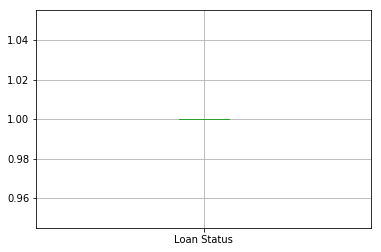

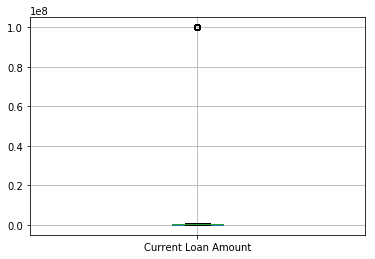

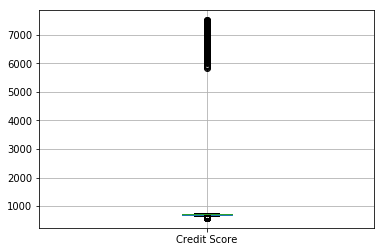

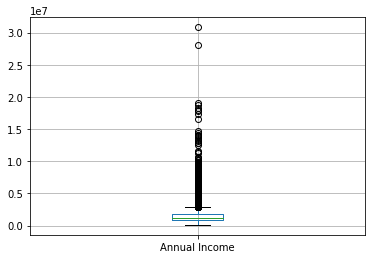

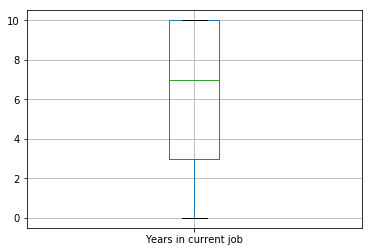

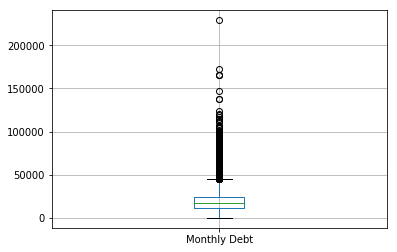

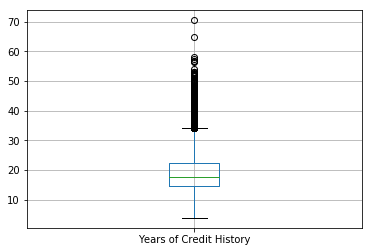

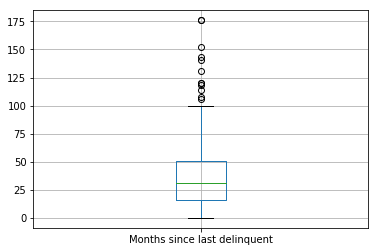

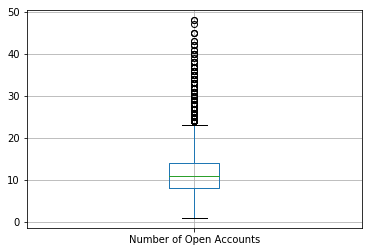

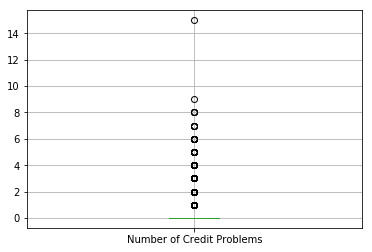

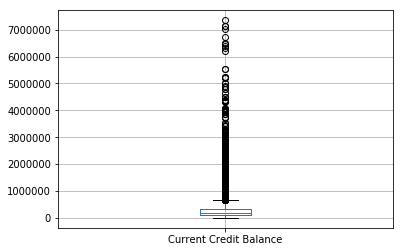

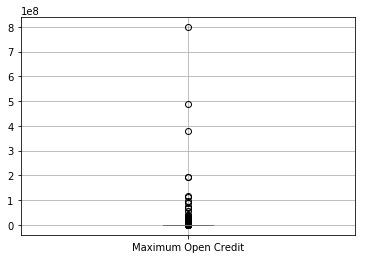

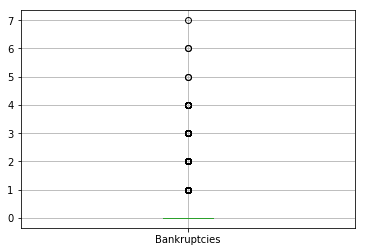

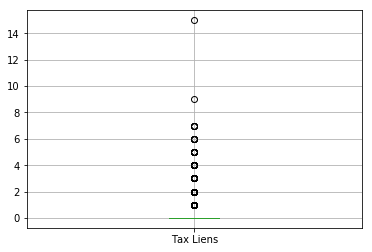

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in box_plot_attr:
    df.boxplot(column=i)
    plt.show()

import seaborn as sns
for i in box_plot_attr:
    sns.boxplot(x=df[i])

In [35]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [70]:
df.head(n=50)

Loan Status  Current Loan Amount        Term  Credit Score  \
2              0           99999999.0  Short Term         741.0   
6              0             217646.0  Short Term         730.0   
8              0             548746.0  Short Term         678.0   
10             0           99999999.0  Short Term         728.0   
12             0           99999999.0  Short Term         740.0   
14             0             234124.0  Short Term         727.0   
17             0             666204.0   Long Term         723.0   
20             1             317108.0   Long Term         687.0   
25             0             465410.0   Long Term         688.0   
28             0           99999999.0  Short Term         746.0   
39             0             449108.0  Short Term         718.0   
40             1             688468.0   Long Term         682.0   
44             0             311762.0   Long Term         680.0   
46             0             129712.0  Short Term         723.0   
47             0             287980.0  Short Term         737.0   
51             1             219692.0   Long Term        6610.0   
53             1             374176.0   Long Term         652.0   
54             0           99999999.0   Long Term         730.0   
55             1             176198.0  Short Term         736.0   
58             0             130922.0  Short Term         747.0   
59             0             174548.0  Short Term         721.0   
60             1             290224.0   Long Term         644.0   
61             0             718784.0   Long Term         672.0   
63             0             602008.0   Long Term         741.0   
64             0             171248.0  Short Term         747.0   
66             0             323466.0   Long Term         699.0   
70             0             211222.0  Short Term         694.0   
71             0             162360.0  Short Term         720.0   
72             0           99999999.0  Short Term         699.0   
76             0             389884.0  Short Term         657.0   
78             0             433312.0  Short Term         736.0   
79             0           99999999.0  Short Term         737.0   
82             0             392282.0   Long Term         688.0   
86             0             378334.0  Short Term         714.0   
87             0           99999999.0  Short Term         734.0   
88             1             194942.0  Short Term         742.0   
89             0             731566.0  Short Term         705.0   
93             0             156772.0  Short Term         748.0   
97             1              78738.0  Short Term        6240.0   
98             0             453464.0  Short Term         712.0   
100            0             166672.0  Short Term         705.0   
102            1             119504.0  Short Term         745.0   
103            0              33022.0  Short Term         723.0   
105            0             280588.0  Short Term         717.0   
106            1             556336.0   Long Term         714.0   
107            0             541310.0  Short Term         722.0   
110            1             765160.0   Long Term         719.0   
113            0             545886.0  Short Term         718.0   
115            0             354046.0   Long Term         676.0   
117            1              86174.0  Short Term        7210.0   

     Annual Income  Years in current job Home Ownership             Purpose  \
2        2231892.0                   8.0       Own Home  Debt Consolidation   
6        1184194.0                   0.0  Home Mortgage  Debt Consolidation   
8        2559110.0                   2.0           Rent  Debt Consolidation   
10        714628.0                   3.0           Rent  Debt Consolidation   
12        776188.0                   0.0       Own Home  Debt Consolidation   
14        693234.0                  10.0           Rent  Debt Consolidation   
17       1821967.0                

2. Basic Data Cleaning

Must convert categorical and ordinal features into numeric features


In [36]:
#Decide which categorical variables you want to use in model

for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature {0} has {1} unique categories".format(col_name, unique_cat))

Feature Term has 2 unique categories
Feature Home Ownership has 4 unique categories
Feature Purpose has 16 unique categories


Let's see how many observations does each category has in Purpose Attribute

In [37]:
print(df['Purpose'].value_counts().sort_values(ascending=False))

Debt Consolidation      28202
Home Improvements        2409
other                    2313
Other                    1150
Business Loan             596
Medical Bills             444
Buy a Car                 428
Buy House                 263
Take a Trip               219
major_purchase            116
small_business            111
moving                     55
vacation                   41
wedding                    39
Educational Expenses       33
renewable_energy            4
Name: Purpose, dtype: int64


In [38]:
#Most of the categories have a very low frequency, we don't want to create dummies for these. 
#We will add those to others

df['Purpose'] = ['Debt Consolidation' if x == 'Debt Consolidation' else 'Other' for x in df['Purpose']]
print(df['Purpose'].value_counts().sort_values(ascending=False))

Debt Consolidation    28202
Other                  8221
Name: Purpose, dtype: int64


In [39]:
#create a list of features to dummy

to_dummy_list = ['Term', 'Home Ownership', 'Purpose']

#function to dummy all the categorical variable used for modeling

def dummy_df(df, to_dummy_list):
    for x in to_dummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x,1)
        df = pd.concat([df, dummies], axis=1)
        
    return df

df = dummy_df(df, to_dummy_list)

In [40]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Credit Score', 'Annual Income',
       'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Term_Long Term',
       'Term_Short Term', 'Home Ownership_HaveMortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Debt Consolidation', 'Purpose_Other'],
      dtype='object')

In [11]:
df.head()

Loan Status  Current Loan Amount  Credit Score  Annual Income  \
2             0           99999999.0         741.0      2231892.0   
6             0             217646.0         730.0      1184194.0   
8             0             548746.0         678.0      2559110.0   
10            0           99999999.0         728.0       714628.0   
12            0           99999999.0         740.0       776188.0   

    Years in current job  Monthly Debt  Years of Credit History  \
2                    8.0      29200.53                     14.9   
6                    0.0      10855.08                     19.6   
8                    2.0      18660.28                     22.6   
10                   3.0      11851.06                     16.0   
12                   0.0      11578.22                      8.5   

    Months since last delinquent  Number of Open Accounts  \
2                           29.0                     18.0   
6                           10.0                     13.0   
8                           33.0                      4.0   
10                          76.0                     16.0   
12                          25.0                      6.0   

    Number of Credit Problems      ...        Bankruptcies  Tax Liens  \
2                         1.0      ...                 0.0        0.0   
6                         1.0      ...                 1.0        0.0   
8                         0.0      ...                 0.0        0.0   
10                        0.0      ...                 0.0        0.0   
12                        0.0      ...                 0.0        0.0   

    Term_Long Term  Term_Short Term  Home Ownership_HaveMortgage  \
2                0                1                            0   
6                0                1                            0   
8                0                1                            0   
10               0                1                            0   
12               0                1                            0   

    Home Ownership_Home Mortgage  Home Ownership_Own Home  \
2                              0                        1   
6                              1                        0   
8                              0                        0   
10                             0                        0   
12                             0                        1   

    Home Ownership_Rent  Purpose_Debt Consolidation  Purpose_Other  
2                     0                           1              0  
6                     0                           1              0  
8                     1                           1              0  
10                    1                           1              0  
12                    0                           1              0  

[5 rows x 22 columns]

############################# --------SKIP TILL Ln 61----detect-and-remove-the-outliers##################################

In [22]:
df1 = df.copy()

In [23]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Loan Status                          0.000
Current Loan Amount             351406.000
Credit Score                        36.000
Annual Income                   811860.500
Years in current job                 7.000
Monthly Debt                     13640.385
Years of Credit History              7.900
Months since last delinquent        35.000
Number of Open Accounts              6.000
Number of Credit Problems            0.000
Current Credit Balance          227382.500
Maximum Open Credit             455675.000
Bankruptcies                         0.000
Tax Liens                            0.000
Term_Long Term                       1.000
Term_Short Term                      1.000
Home Ownership_HaveMortgage          0.000
Home Ownership_Home Mortgage         1.000
Home Ownership_Own Home              0.000
Home Ownership_Rent                  1.000
Purpose_Debt Consolidation           0.000
Purpose_Other                        0.000
dtype: float64


def find_outliers_tukey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 -q1
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    
    outlier_indices = list(x.index[(x<floor) | (x>ceiling)])
    return outlier_indices

tukey_indices = find_outliers_tukey(df1['Annual Income'])
df1 = df1.drop(df1.index[tukey_indices])

DBSCAN for outlier Removal

Note:- Generally, outliers should make up <5% of the total observations-adust model parameter accordingly

The parameter MinPts is the minimum number of neighbors (say 20) within “eps” radius (say 0.1)

In [28]:
from sklearn.cluster import DBSCAN
from collections import Counter

from pylab import rcParams
import seaborn as sb

%matplotlib inline
rcParams['figure.figsize']= 5,4
sb.set_style('whitegrid')

In [31]:
data = df.drop('Loan Status',1)
model = DBSCAN(eps=0.8, min_samples=20).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=20, n_jobs=None, p=None)


In [32]:
############ Visvualizing outliers ######################

print(Counter(model.labels_))
print(data[model.labels_==-1])

Counter({-1: 36423})
       Current Loan Amount  Credit Score  Annual Income  Years in current job  \
2               99999999.0         741.0      2231892.0                   8.0   
6                 217646.0         730.0      1184194.0                   0.0   
8                 548746.0         678.0      2559110.0                   2.0   
10              99999999.0         728.0       714628.0                   3.0   
12              99999999.0         740.0       776188.0                   0.0   
14                234124.0         727.0       693234.0                  10.0   
17                666204.0         723.0      1821967.0                  10.0   
20                317108.0         687.0      1133274.0                   8.0   
25                465410.0         688.0      1722654.0                   3.0   
28              99999999.0         746.0      1749748.0                  10.0   
39                449108.0         718.0      1454507.0                   8.0   
40     

################### Still need to tune the values of DBSCAN as currently it has labeled everything as outlier##########

Take a look at  the outcome variable: Loan Status

In [77]:
print(df['Loan Status'].value_counts())

0    28972
1     7451
Name: Loan Status, dtype: int64


# Defining X & Y without NAN dataset (will be useful for simpler models like LR, DT, SVM)

In [41]:
X2 = df.drop('Loan Status',1)
Y2 = df['Loan Status']

In [42]:
X2.shape

(36423, 21)

In [14]:
Y2.shape

(36423,)

In [16]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 21 columns):
Current Loan Amount             36423 non-null float64
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens                       36423 non-null float64
Term_Long Term                  36423 non-null uint8
Term_Short Term                 36423 non-null uint8
Home Ownership_HaveMortgage     36423 non-null uint8
Home Ownership_Ho

########################################## NORMALIZATION OF DATASET ############################################

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def get_data(X, Y, standard=True, minmax=False):

    x_train, y_train = X, Y

    min_max_scaler = MinMaxScaler()
    standard_scaler = StandardScaler()

    x_train_standard = pd.DataFrame(standard_scaler.fit_transform(x_train), columns=x_train.columns)
    x_train_minmax = pd.DataFrame(min_max_scaler.fit_transform(x_train), columns=x_train.columns)

    y_train = pd.DataFrame(y_train)

    if standard:
        return x_train_standard, y_train
    elif minmax:
        return x_train_minmax, y_train
    else:
        return False

In [44]:
X2, Y2 = get_data(X2, Y2, standard=True, minmax=False)

C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 21 columns):
Current Loan Amount             36423 non-null float64
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens                       36423 non-null float64
Term_Long Term                  36423 non-null float64
Term_Short Term                 36423 non-null float64
Home Ownership_HaveMortgage     36423 non-null float64
Home Owners

In [45]:
Y2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 1 columns):
Loan Status    36423 non-null int64
dtypes: int64(1)
memory usage: 569.1 KB


In [46]:
X2.head()

Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0             2.530987     -0.218802       0.820013              0.507877   
1            -0.397980     -0.226451      -0.299615             -1.707632   
2            -0.388261     -0.262606       1.169696             -1.153755   
3             2.530987     -0.227841      -0.801420             -0.876816   
4             2.530987     -0.219498      -0.735633             -1.707632   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0      0.820715                -0.625862                     -0.266987   
1     -0.695342                 0.080393                     -1.133921   
2     -0.050325                 0.531194                     -0.084474   
3     -0.613035                -0.460568                      1.877536   
4     -0.635583                -1.587571                     -0.449499   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                 1.304039                   1.540895                0.108212   
1                 0.302347                   1.540895               -0.445369   
2                -1.500697                  -0.352181                0.546400   
3                 0.903362                  -0.352181               -0.187841   
4                -1.100021                  -0.352181               -0.407861   

       ...        Bankruptcies  Tax Liens  Term_Long Term  Term_Short Term  \
0      ...           -0.319178  -0.129041       -0.639329         0.639329   
1      ...            2.461357  -0.129041       -0.639329         0.639329   
2      ...           -0.319178  -0.129041       -0.639329         0.639329   
3      ...           -0.319178  -0.129041       -0.639329         0.639329   
4      ...           -0.319178  -0.129041       -0.639329         0.639329   

   Home Ownership_HaveMortgage  Home Ownership_Home Mortgage  \
0                    -0.048932                     -1.034616   
1                    -0.048932                      0.966542   
2                    -0.048932                     -1.034616   
3                    -0.048932                     -1.034616   
4                    -0.048932                     -1.034616   

   Home Ownership_Own Home  Home Ownership_Rent  Purpose_Debt Consolidation  \
0                 3.219384            -0.803981                    0.539911   
1                -0.310618            -0.803981                    0.539911   
2                -0.310618             1.243810                    0.539911   
3                -0.310618             1.243810                    0.539911   
4                 3.219384            -0.803981                    0.539911   

   Purpose_Other  
0      -0.539911  
1      -0.539911  
2      -0.539911  
3      -0.539911  
4      -0.539911  

[5 rows x 21 columns]

In [47]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 21 columns):
Current Loan Amount             36423 non-null float64
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens                       36423 non-null float64
Term_Long Term                  36423 non-null float64
Term_Short Term                 36423 non-null float64
Home Ownership_HaveMortgage     36423 non-null float64
Home Owners

Distribution of features : Histograms  broken up by outcome categories (in this case Loan Status)

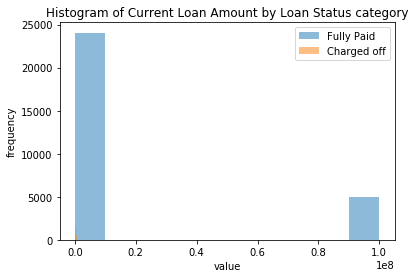

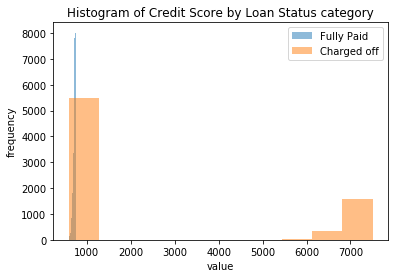

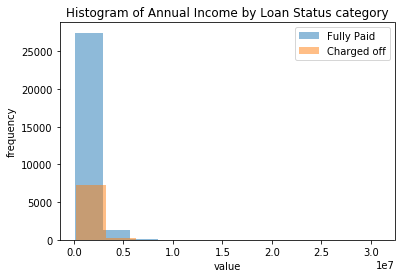

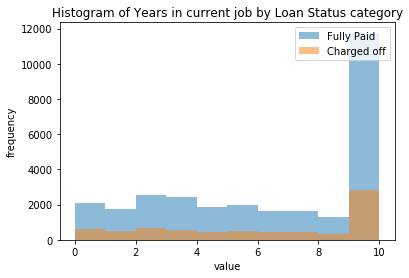

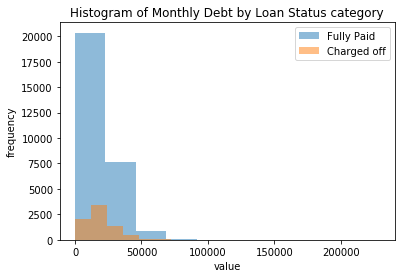

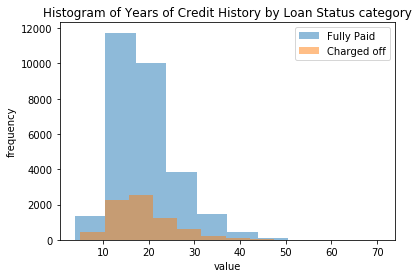

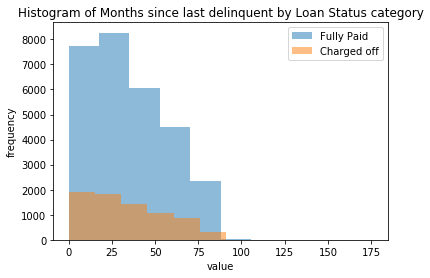

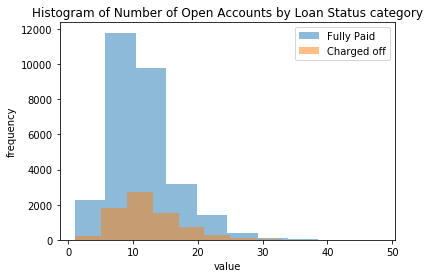

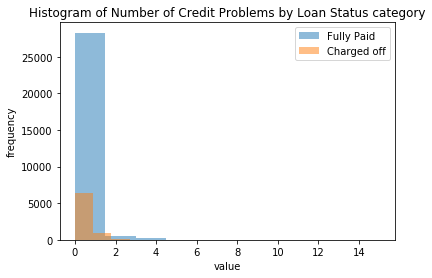

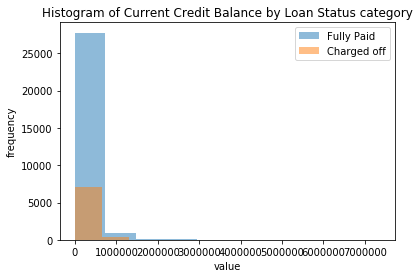

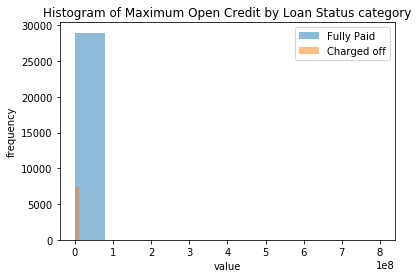

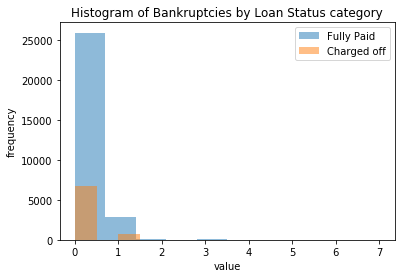

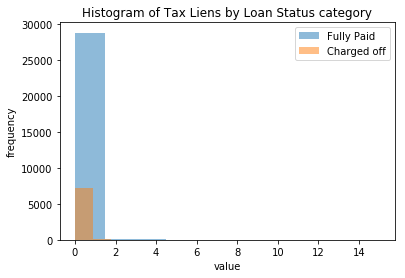

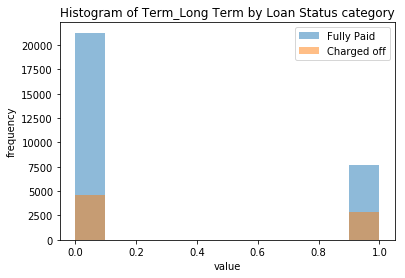

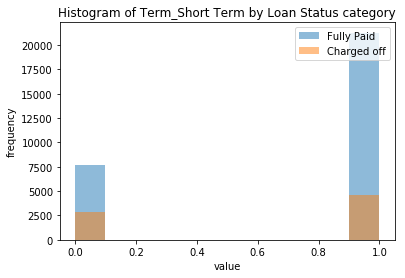

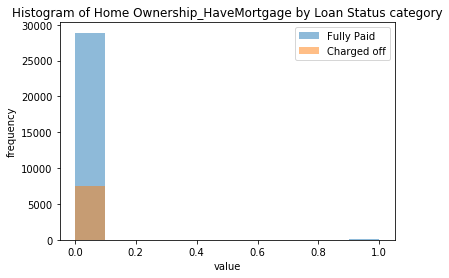

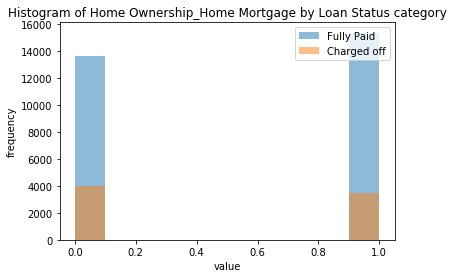

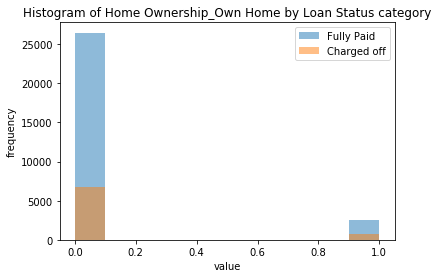

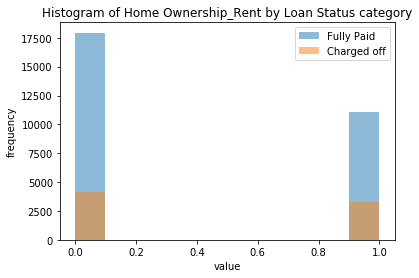

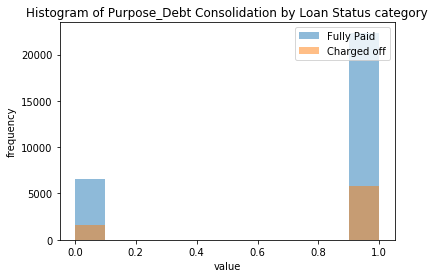

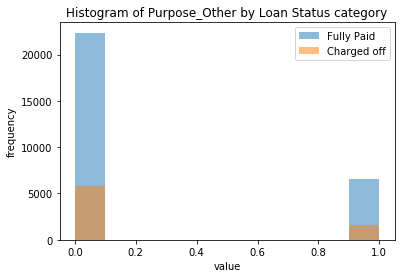

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Fully Paid')
    plt.hist(list(x[y==1]), alpha=0.5, label='Charged off')
    plt.title('Histogram of {0} by Loan Status category'.format(x.name))
    plt.xlabel("value")
    plt.ylabel("frequency")
    plt.legend(loc='upper right')
    plt.show()
    
for x in X2.columns:
    plot_histogram(X2[x],Y2)

def mi(row):
    ai = row["Annual Income"]
    md = row["Monthly Debt"]

    mr = ai / 12 - md
    return mr


def cr(row):
    cla = row["Current Loan Amount"]
    ai = row["Annual Income"]
    return cla / ai

X2["Monthly Income"] = X2.apply(lambda row: mi(row), axis=1)
X2["Credit Ration per Year"]= X2.apply(lambda row: cr(row), axis=1)

In [31]:
X2['Loan Status'] = Y2
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = X2.corr()
corr.style.background_gradient(cmap='coolwarm')

In [32]:
X2 = X2.drop('Loan Status',1)

In [23]:
X2.shape

(36423, 23)

In [24]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 23 columns):
Current Loan Amount             36423 non-null float64
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens                       36423 non-null float64
Term_Long Term                  36423 non-null float64
Term_Short Term                 36423 non-null float64
Home Ownership_HaveMortgage     36423 non-null float64
Home Owners

Dimensionality Reduction using PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 7 )
X_pca = pd.DataFrame(pca.fit_transform(X2))

In [ ]:
######################## Merging 2 dataframes namely DF_PCA (X_pca) & Y-target-DF (Y2) ########################

PCA_df = X_pca.reset_index(drop=True).merge(Y2.reset_index(drop=True), left_index=True, right_index=True)

In [ ]:
#######################Export Pandas DataFrame to a CSV File###################################
PCA_df.to_csv(r'PCA_dataset.csv')

Feature generation Using Feature Tools

Within featuretools there is a standard format for representing data and build features, which is a entity set. A EntitySet stores information about entities (database table), variables (columns in database tables), relationships, and the data itself.

In [94]:
import featuretools as ft

es = ft.EntitySet("X2")
from featuretools import variable_types as vtypes

es.entity_from_dataframe(entity_id="X2",
                         dataframe=X2, make_index = True, index = 'index')

#Must read for first time users
#es.entity_from_dataframe(entity_id = 'data', dataframe = df, 
                      ### (must add these 2 attributes)   make_index = True, index = 'index')

Entityset: X2
  Entities:
    X2 [Rows: 36423, Columns: 24]
  Relationships:
    No relationships

Feature Primitives¶
A feature primitive is an operation applied to a table or a set of tables to create a feature. Feature primitives fall into two categories:

Aggregation: function that groups together children for each parent feature and calculates a statistic such as mean, min, max, or standard deviation across the children.

Transformation: an operation applied to one or more columns in a single table.

A list of the available features primitives in featuretools can be viewed below.

In [95]:
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100

primitives[primitives['type'] == 'transform']

name       type  \
19               months  transform   
20                  not  transform   
21                weeks  transform   
22             absolute  transform   
23                 isin  transform   
24              minutes  transform   
25              cum_min  transform   
26           time_since  transform   
27              seconds  transform   
28            cum_count  transform   
29               negate  transform   
30           characters  transform   
31                hours  transform   
32              cum_sum  transform   
33               divide  transform   
34              weekend  transform   
35                 days  transform   
36                   or  transform   
37             subtract  transform   
38            longitude  transform   
39                 year  transform   
40           percentile  transform   
41                month  transform   
42  time_since_previous  transform   
43                 diff  transform   
44                 week  transform   
45              is_null  transform   
46           days_since  transform   
47               minute  transform   
48              cum_max  transform   
49             numwords  transform   
50               second  transform   
51             cum_mean  transform   
52                  mod  transform   
53              weekday  transform   
54                 hour  transform   
55             multiply  transform   
56            haversine  transform   
57                years  transform   
58                  day  transform   
59                  and  transform   
60                  add  transform   
61             latitude  transform   

                                                                                           description  
19                                            Transform a Timedelta feature into the number of months.  
20                                      For each value of the base feature, negates the boolean value.  
21                                             Transform a Timedelta feature into the number of weeks.  
22                                                                     Absolute value of base feature.  
23                        For each value of the base feature, checks whether it is in a provided list.  
24                                           Transform a Timedelta feature into the number of minutes.  
25     Calculates the min of previous values of an instance for each value in a time-dependent entity.  
26                                                              Calculates time since the cutoff time.  
27                                           Transform a Timedelta feature into the number of seconds.  
28  Calculates the number of previous values of an instance for each value in a time-dependent entity.  
29                                                 Creates a transform feature that negates a feature.  
30                                                            Return the characters in a given string.  
31                                             Transform a Timedelta feature into the number of hours.  
32     Calculates the sum of previous values of an instance for each value in a time-dependent entity.  
33                                              Creates a transform feature that divides two features.  
34                                             Transform Datetime feature into the boolean of Weekend.  
35                                              Transform a Timedelta feature into the number of days.  
36                                           For two boolean values, determine if one value is 'True'.  
37                                            Creates a transform feature that subtracts two features.  
38                                                 Returns the second value on the tuple base feature.  
39                                                         Transform a Datetime feature into the year.  
40                           For eac

Deep Feature Synthesis¶ DFS stacks feature primitives to form features with a "depth" equal to the number of primitives.

In [96]:
# use mutiply, add, divide, substract
default_trans_primitives =  ['add_numeric', 'multiply_numeric', 'subtract_numeric', 'divide_numeric']



In [97]:
# DFS with specified primitives
feature_matrix, features = ft.dfs(entityset = es, target_entity="X2",
                       trans_primitives = default_trans_primitives,
                       n_jobs = 1, verbose = 1,
                       max_depth = 1, features_only=False)  #set max_depth = 1

Built 1541 features
Elapsed: 00:26 | Remaining: 00:00 | Progress: 100%|██| Calculated: 11/11 chunks


In [54]:
features


[<Feature: Current Loan Amount>,
 <Feature: Credit Score>,
 <Feature: Annual Income>,
 <Feature: Years in current job>,
 <Feature: Monthly Debt>,
 <Feature: Years of Credit History>,
 <Feature: Months since last delinquent>,
 <Feature: Number of Open Accounts>,
 <Feature: Number of Credit Problems>,
 <Feature: Current Credit Balance>,
 <Feature: Maximum Open Credit>,
 <Feature: Bankruptcies>,
 <Feature: Tax Liens>,
 <Feature: Term_Long Term>,
 <Feature: Term_Short Term>,
 <Feature: Home Ownership_HaveMortgage>,
 <Feature: Home Ownership_Home Mortgage>,
 <Feature: Home Ownership_Own Home>,
 <Feature: Home Ownership_Rent>,
 <Feature: Purpose_Debt Consolidation>,
 <Feature: Purpose_Other>,
 <Feature: Number of Open Accounts + Years in current job>,
 <Feature: Home Ownership_HaveMortgage + Purpose_Other>,
 <Feature: Months since last delinquent + Term_Short Term>,
 <Feature: Number of Credit Problems + Term_Short Term>,
 <Feature: Term_Long Term + Years of Credit History>,
 <Feature: Credi

In [98]:
# encode values
fm_encoded, features_encoded = ft.encode_features(feature_matrix,
                                                  features)
fm_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 0 to 36422
Columns: 1541 entries, Current Loan Amount to Tax Liens / Maximum Open Credit
dtypes: float64(1541)
memory usage: 428.5 MB


In [99]:
fm_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 0 to 36422
Columns: 1541 entries, Current Loan Amount to Tax Liens / Maximum Open Credit
dtypes: float64(1541)
memory usage: 428.5 MB


In [100]:
fm_encoded.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income',
       'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       ...
       'Bankruptcies / Purpose_Other',
       'Months since last delinquent / Tax Liens',
       'Tax Liens / Purpose_Debt Consolidation',
       'Home Ownership_Own Home / Home Ownership_HaveMortgage',
       'Current Credit Balance / Credit Ration per Year',
       'Current Credit Balance / Home Ownership_Own Home',
       'Tax Liens / Home Ownership_Rent', 'Monthly Debt / Home Ownership_Rent',
       'Months since last delinquent / Maximum Open Credit',
       'Tax Liens / Maximum Open Credit'],
      dtype='object', length=1541)

Correlation Check

In [102]:
fm_encoded.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income',
       'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       ...
       'Months since last delinquent / Tax Liens',
       'Tax Liens / Purpose_Debt Consolidation',
       'Home Ownership_Own Home / Home Ownership_HaveMortgage',
       'Current Credit Balance / Credit Ration per Year',
       'Current Credit Balance / Home Ownership_Own Home',
       'Tax Liens / Home Ownership_Rent', 'Monthly Debt / Home Ownership_Rent',
       'Months since last delinquent / Maximum Open Credit',
       'Tax Liens / Maximum Open Credit', 'Loan Status'],
      dtype='object', length=1542)

In [103]:
fm_encoded.shape

(36423, 1542)

In [104]:
###########################################Creating the new csv with Feature Tools created features ##############
import sklearn.feature_selection 

#Such a large set of features may cause over fitting  and also slow computing
#Use feature selection  to select the most importatnt features

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(fm_encoded, Y2)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [fm_encoded.columns[i] for i in indices_selected]

FT = fm_encoded[colnames_selected]


ValueError: could not convert string to float: 'Fully Paid'

In [ ]:
######################## Merging 2 dataframes namely Feature_Tools_created_DF (FT) & Y-target-DF (Y2) ########################

FT = FT.reset_index(drop=True).merge(Y2.reset_index(drop=True), left_index=True, right_index=True)

In [ ]:
#######################Export Pandas DataFrame to a CSV File###################################
FT.to_csv(r'FT_dataset.csv')

In [60]:
#absolute correlation matrix sorted with descending order
corr_abs = abs(fm_encoded.corr())
corr_abs[['Loan Status']].sort_values(by='Loan Status',ascending=False)

KeyError: "['Loan Status'] not in index"

FEATURE ENGINEERING

In [24]:
from itertools import combinations 
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3,interaction_only=True)
poly_main = poly.fit_transform(X2)
poly_main_names = poly.get_feature_names(X2.columns)

X2 = pd.DataFrame(data=poly_main, columns=poly_main_names)

#The interactions amongst dummy variables belongiing to the same categorical feature are always zero
#Therefore, we have to remove those empty interaction terms

noint_indices = [i for i, x in enumerate(list((X2 == 0).all())) if x]
X2 = X2.drop(X2.columns[noint_indices], axis=1)

In [25]:
X2.shape

(36423, 1391)

In [26]:
X2['Loan Status'] = Y2['Loan Status']
X2.shape

(36423, 24)

In [ ]:
#absolute correlation matrix sorted with descending order
corr_abs = abs(X2.corr())
corr_abs[['Loan Status']].sort_values(by='Loan Status',ascending=False)

In [27]:
X2 = X2.drop('Loan Status',1)

In [28]:
X2.shape

(36423, 1391)

In [29]:
Y2.shape

(36423,)

In [33]:
X2 = X2.drop('1',1)

FEATURE SELECTION

In [34]:
import sklearn.feature_selection 

#Such a large set of features may cause over fitting  and also slow computing
#Use feature selection  to select the most importatnt features

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X2, Y2)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X2.columns[i] for i in indices_selected]

X_train_selected = X2[colnames_selected]


C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [43]:
X_train_selected.columns

Index(['Credit Score', 'Credit Score Annual Income',
       'Credit Score Years in current job', 'Credit Score Monthly Debt',
       'Credit Score Years of Credit History',
       'Credit Score Months since last delinquent',
       'Credit Score Number of Open Accounts',
       'Credit Score Purpose_Debt Consolidation',
       'Credit Score Years in current job Years of Credit History',
       'Credit Score Years in current job Number of Open Accounts',
       'Credit Score Years in current job Purpose_Debt Consolidation',
       'Credit Score Monthly Debt Years of Credit History',
       'Credit Score Monthly Debt Number of Open Accounts',
       'Credit Score Monthly Debt Purpose_Debt Consolidation',
       'Credit Score Years of Credit History Months since last delinquent',
       'Credit Score Years of Credit History Number of Open Accounts',
       'Credit Score Years of Credit History Purpose_Debt Consolidation',
       'Credit Score Months since last delinquent Number of Open Ac

In [ ]:
######################## Merging 2 dataframes namely Polynomial_DF (X_train_selected) & Y-target-DF (Y2) ########################

X_train_selected = X_train_selected.reset_index(drop=True).merge(Y2.reset_index(drop=True), left_index=True, right_index=True)

In [ ]:
#######################Export Pandas DataFrame to a CSV File###################################
X_train_selected.to_csv(r'Polynomial_dataset.csv')

MERGED DATASET with ALL 3 DATASET BEST FEATURES COMBINED

In [ ]:
##Merging 4 dataframes namely DF_PCA (X_pca), Feature_Tools_created_DF (FT), polynomial_DF (X_train_selected) & Y-target-DF (Y2) ########################

X_train_selected = X_train_selected.reset_index(drop=True).merge(DF_PCA.reset_index(drop=True), left_index=True, right_index=True)
X_train_selected = X_train_selected.reset_index(drop=True).merge(FT.reset_index(drop=True), left_index=True, right_index=True)
X_train_selected = X_train_selected.reset_index(drop=True).merge(Y2.reset_index(drop=True), left_index=True, right_index=True)

In [ ]:
#######################Export Pandas DataFrame to a CSV File###################################
X_train_selected.to_csv(r'Merged_dataset.csv')

################################### SMOOTHING FOR SAMPLING #######################################

(I'll do down sampling to decrease the size of dataset long with balancing the data)
 Note:- Prefered way is 'SMOTE' which is combo of re-sampling & down sampling

Here are the steps:

First, we'll separate observations from each class into different DataFrames.

Next, we'll resample the majority class without replacement, setting the number of samples to match that of the minority class.

Finally, we'll combine the down-sampled majority class DataFrame with the original minority class DataFrame.

In [48]:
############# Try with the final dataset with best features####################
##### Here I'm using normal Dataset #######

df_best = X2.reset_index(drop=True).merge(Y2.reset_index(drop=True), left_index=True, right_index=True)

In [49]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 22 columns):
Current Loan Amount             36423 non-null float64
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens                       36423 non-null float64
Term_Long Term                  36423 non-null float64
Term_Short Term                 36423 non-null float64
Home Ownership_HaveMortgage     36423 non-null float64
Home Owners

In [50]:
df_majority = df_best[df_best['Loan Status']==0]

Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0             2.530987     -0.218802       0.820013              0.507877   
1            -0.397980     -0.226451      -0.299615             -1.707632   
2            -0.388261     -0.262606       1.169696             -1.153755   
3             2.530987     -0.227841      -0.801420             -0.876816   
4             2.530987     -0.219498      -0.735633             -1.707632   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0      0.820715                -0.625862                     -0.266987   
1     -0.695342                 0.080393                     -1.133921   
2     -0.050325                 0.531194                     -0.084474   
3     -0.613035                -0.460568                      1.877536   
4     -0.635583                -1.587571                     -0.449499   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                 1.304039                   1.540895                0.108212   
1                 0.302347                   1.540895               -0.445369   
2                -1.500697                  -0.352181                0.546400   
3                 0.903362                  -0.352181               -0.187841   
4                -1.100021                  -0.352181               -0.407861   

      ...       Tax Liens  Term_Long Term  Term_Short Term  \
0     ...       -0.129041       -0.639329         0.639329   
1     ...       -0.129041       -0.639329         0.639329   
2     ...       -0.129041       -0.639329         0.639329   
3     ...       -0.129041       -0.639329         0.639329   
4     ...       -0.129041       -0.639329         0.639329   

   Home Ownership_HaveMortgage  Home Ownership_Home Mortgage  \
0                    -0.048932                     -1.034616   
1                    -0.048932                      0.966542   
2                    -0.048932                     -1.034616   
3                    -0.048932                     -1.034616   
4                    -0.048932                     -1.034616   

   Home Ownership_Own Home  Home Ownership_Rent  Purpose_Debt Consolidation  \
0                 3.219384            -0.803981                    0.539911   
1                -0.310618            -0.803981                    0.539911   
2                -0.310618             1.243810                    0.539911   
3                -0.310618             1.243810                    0.539911   
4                 3.219384            -0.803981                    0.539911   

   Purpose_Other  Loan Status  
0      -0.539911            0  
1      -0.539911            0  
2      -0.539911            0  
3      -0.539911            0  
4      -0.539911            0  

[5 rows x 22 columns]

In [54]:
df_best['Loan Status'].value_counts()

0    28972
1     7451
Name: Loan Status, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_best[df_best['Loan Status']==0]
df_minority = df_best[df_best['Loan Status']==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=10000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.balance.value_counts()

#################### SVM ####################

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import svm as SVM
from sklearn.naive_bayes import GaussianNB as NB
from xgboost import XGBClassifier

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer

cv = StratifiedKFold(n_splits=10, random_state=42)

1. Tune Hyperparameter of Base Classifiers (without using sampling)

In [ ]:
################################### SVC Linear ##############################################
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy
#param values
penal=["l2"]
losses=["hinge","squared_hinge"]
a=numpy.arange(.0000000001, .0001, .00005)
tolerance=a.tolist()
c_regularization=range(10,3500,10)
intercept_scale=range(1,100,4)
max_iters=range(100,4000,100)
#all param-val dictionary
#grid_params_lr = dict('C':[C_regularization], 'penalty':["l1","l2"], 'intercept_scaling':[ntercept_scal_vals], 'max_iter':[max_iter_vals], 'solver' :["newton-cg", "llbfgs", "sag"])
grid_params_svm = dict(penalty=penal, loss=losses, tol=tolerance, C=c_regularization, max_iter=max_iters)
#creating  grid instance  
#KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2)
svm = LinearSVC(fit_intercept=False)
#neigh_grid=GridSearchCV(knn,grid_params_nn,cv=10)
svm_ins=RandomizedSearchCV(svm,grid_params_svm,cv=10,scoring=f1,n_iter=500)
svm_ins.fit(X_pca, Y2)

In [ ]:
svm_ins.best_estimator_

In [ ]:
svm_ins.best_score_

In [ ]:
##################################### Para tuningfor sklearn.svm.SVC ###########################################
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy
#param values
c_regularization = range(10,1500,10)
kernel_fn = ["linear", "poly", "rbf", "sigmoid"]
power=range(2,7,1)
b=numpy.arange(.0000000001, .001, .00005)
max_iters=range(100,4000,100)
decision_fn = ["ovo", "ovr"]
tolerance=b.tolist()
#all param-val dictionary
#grid_params_lr = dict('C':[C_regularization], 'penalty':["l1","l2"], 'intercept_scaling':[ntercept_scal_vals], 'max_iter':[max_iter_vals], 'solver' :["newton-cg", "llbfgs", "sag"])
grid_params_sv = dict(kernel=kernel_fn, degree=power, decision_function_shape=decision_fn, tol=tolerance, C=c_regularization, max_iter=max_iters)
#creating  grid instance  
#KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2)
sv = SVC()
#neigh_grid=GridSearchCV(knn,grid_params_nn,cv=10)
sv_ins=RandomizedSearchCV(sv,grid_params_sv,cv=10,scoring=f1,n_iter=200)
sv_ins.fit(X_pca, Y2)

In [ ]:
################################# Hyper-Para tuning for XGboost ########################################## 
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy

d=numpy.arange(.05, 5, .05)
lr=d.tolist()
max_dep=[ 3, 4, 5, 6, 8, 10, 12, 15]
min_child_weights=range(1,32,2)
e=numpy.arange(.1, 5, .1)
gammaa=e.tolist()
f=numpy.arange(.1,1,.25)
colsample_bytre=f.tolist()  
    
grid_params_xgb = dict(learning_rate=lr, max_depth=max_dep, min_child_weight=min_child_weights, gamma=gammaa, colsample_bytree=colsample_bytre)
#creating  grid instance  
xgb = XGBClassifier()
xgb_ins=RandomizedSearchCV(xgb,grid_params_xgb,cv=10,scoring=profit_scoring,n_iter=200)
xgb_ins.fit(X_train_prepared, y_train)

In [ ]:
############################### SGD With AdaBoost ###########################
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

ada=AdaBoostClassifier(base_estimator=SGDClassifier(alpha=7.689254604312759e-05, tol=0.021813007116063123, l1_ratio=0.4260378389709515, random_state=231,penalty='elasticnet', loss='modified_huber'), n_estimators=50, learning_rate=1.0)
sum(cross_validate(ada, X_train_prepared, y=y_train, cv=cv,scoring=f1)['test_score'])

In [ ]:
from sklearn.neural_network import MLPClassifier

def evaluate_classifier1(e_name, e, X_train, y_train, n_folds=10):
        k_fold = StratifiedKFold (n_splits=n_folds, random_state=42)
        scores = cross_val_score(e, X_merge, Y, cv=k_fold, scoring=f1)
        print('Overall cost of {0} is {1}'.format(e_name, scores.mean()))

estimators1 = dict()
estimators1['MLPClassifier']=MLPClassifier(alpha=1); 
for e_name, e in estimators1.items():
    evaluate_classifier1(e_name, e, X2, Y2, 10)